In [1]:
import json
import h5py

import sys
sys.path.insert(0, '/cndd/fangming/CEMBA/snmcseq_dev')
import tqdm
from matplotlib.cm import get_cmap
import fbpca
import datetime

from __init__ import *
from __init__jupyterlab import *
import snmcseq_utils

In [2]:
today = datetime.date.today()
figures = './figures/{}_{{}}'.format(today)
results = './results/{}_{{}}'.format(today)
figures, results

('./figures/2021-05-01_{}', './results/2021-05-01_{}')

# read in processed data

In [3]:
# palette as json
file = './data/palette.json'
with open(file, 'r') as f:
    palette = json.load(f)
palette

{'Slice1_Replicate1': [0.19215686274509805,
  0.5098039215686274,
  0.7411764705882353],
 'Slice1_Replicate2': [0.4196078431372549,
  0.6823529411764706,
  0.8392156862745098],
 'Slice1_Replicate3': [0.6196078431372549,
  0.792156862745098,
  0.8823529411764706],
 'Slice2_Replicate1': [0.9019607843137255,
  0.3333333333333333,
  0.050980392156862744],
 'Slice2_Replicate2': [0.9921568627450981,
  0.5529411764705883,
  0.23529411764705882],
 'Slice2_Replicate3': [0.9921568627450981,
  0.6823529411764706,
  0.4196078431372549],
 'Slice3_Replicate1': [0.19215686274509805,
  0.6392156862745098,
  0.32941176470588235],
 'Slice3_Replicate2': [0.4549019607843137,
  0.7686274509803922,
  0.4627450980392157],
 'Slice3_Replicate3': [0.6313725490196078,
  0.8509803921568627,
  0.6078431372549019]}

In [4]:
file = './data/processed_vizgen_merfish_may1_2021.h5ad'
samples = [
    'Slice1_Replicate1',
    'Slice1_Replicate2',
    'Slice1_Replicate3',
    
    'Slice2_Replicate1',
    'Slice2_Replicate2',
    'Slice2_Replicate3',
    
    'Slice3_Replicate1',
    'Slice3_Replicate2',
    'Slice3_Replicate3',
]

data = {}
for sample in samples:
    data[sample] = pd.read_hdf(file, 'data_'+sample)

In [5]:
print(palette[sample])
data[sample].head()

[0.6313725490196078, 0.8509803921568627, 0.6078431372549019]


,x,y,fov,volume,center_x,center_y,min_x,max_x,min_y,max_y,...,Pdgfrb,Ptk7,Ret,Ror1,Ror2,Ros1,Ryk,Tek,Tie1,Tyro3
102664563492900048462363937849459428087,-2858.525385,-2565.174049,12,825.112453,416.766612,6086.123983,412.441212,421.092012,6076.717182,6095.530783,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.015873,0.0
248024456595654429600598295124535343200,-2816.939692,-2585.356593,12,460.431146,416.982612,6039.899981,412.873212,421.092012,6033.949181,6045.850782,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.008547,0.0,0.000000,0.0
248517492611370834464009662840236881305,-2824.661196,-2589.319193,12,1489.933543,410.022012,6045.083982,401.209212,418.834812,6033.625181,6056.542782,...,0.006024,0.003012,0.0,0.0,0.000000,0.0,0.033133,0.0,0.000000,0.0
267194455595590501971330204981279503222,-2831.013698,-2582.409286,12,432.760783,413.424012,6053.831982,409.741212,417.106812,6048.313182,6059.350782,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
80719596629301901340444638136238672607,-2851.685262,-2569.008578,12,297.297646,416.340012,6078.293982,412.765212,419.914812,6074.233182,6082.354783,...,0.000000,0.000000,0.0,0.0,0.012987,0.0,0.000000,0.0,0.000000,0.0


./figures/2021-05-01_coverage.pdf


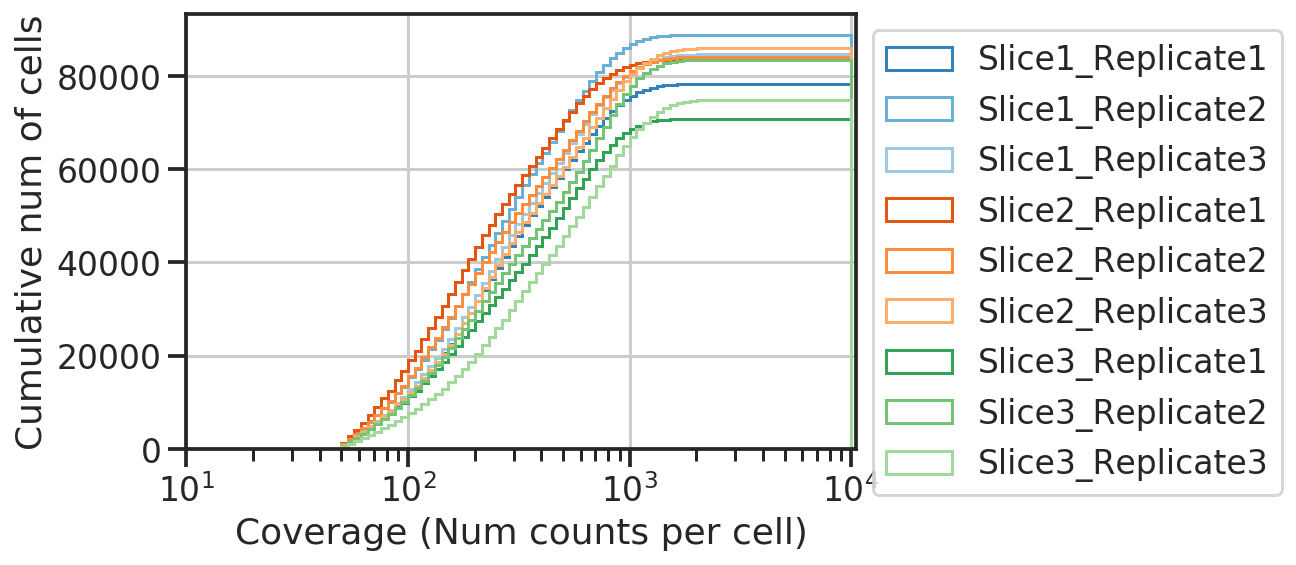

In [6]:
bins = np.power(10, np.linspace(1, 4, 100))
histstyle = dict(histtype='step')# edgecolor='none')

fig, ax = plt.subplots()
for sample in samples:
    ax.hist(data[sample]['cell_cov'], bins=bins, color=palette[sample], label=sample, 
            cumulative=True,
            **histstyle
           )
ax.set_xlim(xmin=10)
ax.set_xscale('log')
ax.set_xlabel('Coverage (Num counts per cell)')
ax.set_ylabel('Cumulative num of cells')
ax.legend(bbox_to_anchor=(1,1))

output = figures.format('coverage.pdf')
print(output)
snmcseq_utils.savefig(fig, output)

# generate images for all genes


In [37]:
def plot_FISH(data, gene, output, close=False):
    
    fig, axs = plt.subplots(3, 3, figsize=(15,12), sharex=True, sharey=True)
    cax = fig.add_axes([0.95, 0.7, 0.02, 0.1])
    for i, (ax, sample) in enumerate(zip(axs.flat, data.keys())):
        toplot = data[sample]
        vmaxp = 99
        vmin, vmax = 0, np.percentile(toplot[gene], vmaxp)
        cmap = sns.cubehelix_palette(as_cmap=True)
        x, y = 'x', 'y'
        sns.scatterplot(x=x, y=y, hue=gene, data=toplot, 
                        s=1, linewidth=0, alpha=0.3,
                        legend=False, 
                        rasterized=True, 
                        vmin=vmin, 
                        vmax=vmax,
                        ax=ax,
                       )
        g = sns.scatterplot(x=x, y=y, hue=gene, data=toplot[toplot[gene]>0], 
                            s=3, linewidth=0, alpha=1,
                            legend=False,
                            rasterized=True, 
                            vmin=vmin, 
                            vmax=vmax,
                            palette=cmap,
                            ax=ax,
                           )
        ax.axis('off')
        ax.set_aspect('equal')
        ax.set_title("{}".format(sample), loc='left', fontsize=15)
        
        # scale bar
        if i == 0:
            l, r, h = 3500, 4500, -3000
            ax.hlines(h, l, r, color='k', linewidth=3)
            ax.text(r, h-100, '1 mm', va='top', ha='right', fontsize=15)
        
#     # colorbar
    norm = plt.Normalize(0, vmaxp)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm,)
    fig.colorbar(sm, cax=cax, label='Percentile per slice', ticks=[0, vmaxp])

    fig.suptitle(gene, y=0.92, fontsize=18)
    fig.subplots_adjust(wspace=0, hspace=0)
    if output:
        print(output)
        snmcseq_utils.savefig(fig, output)
    if close:
        plt.close()
    

In [38]:
genes = data[sample].columns.tolist()[11:]
len(genes)

483

  0%|          | 0/483 [00:07<?, ?it/s]

7.511347770690918


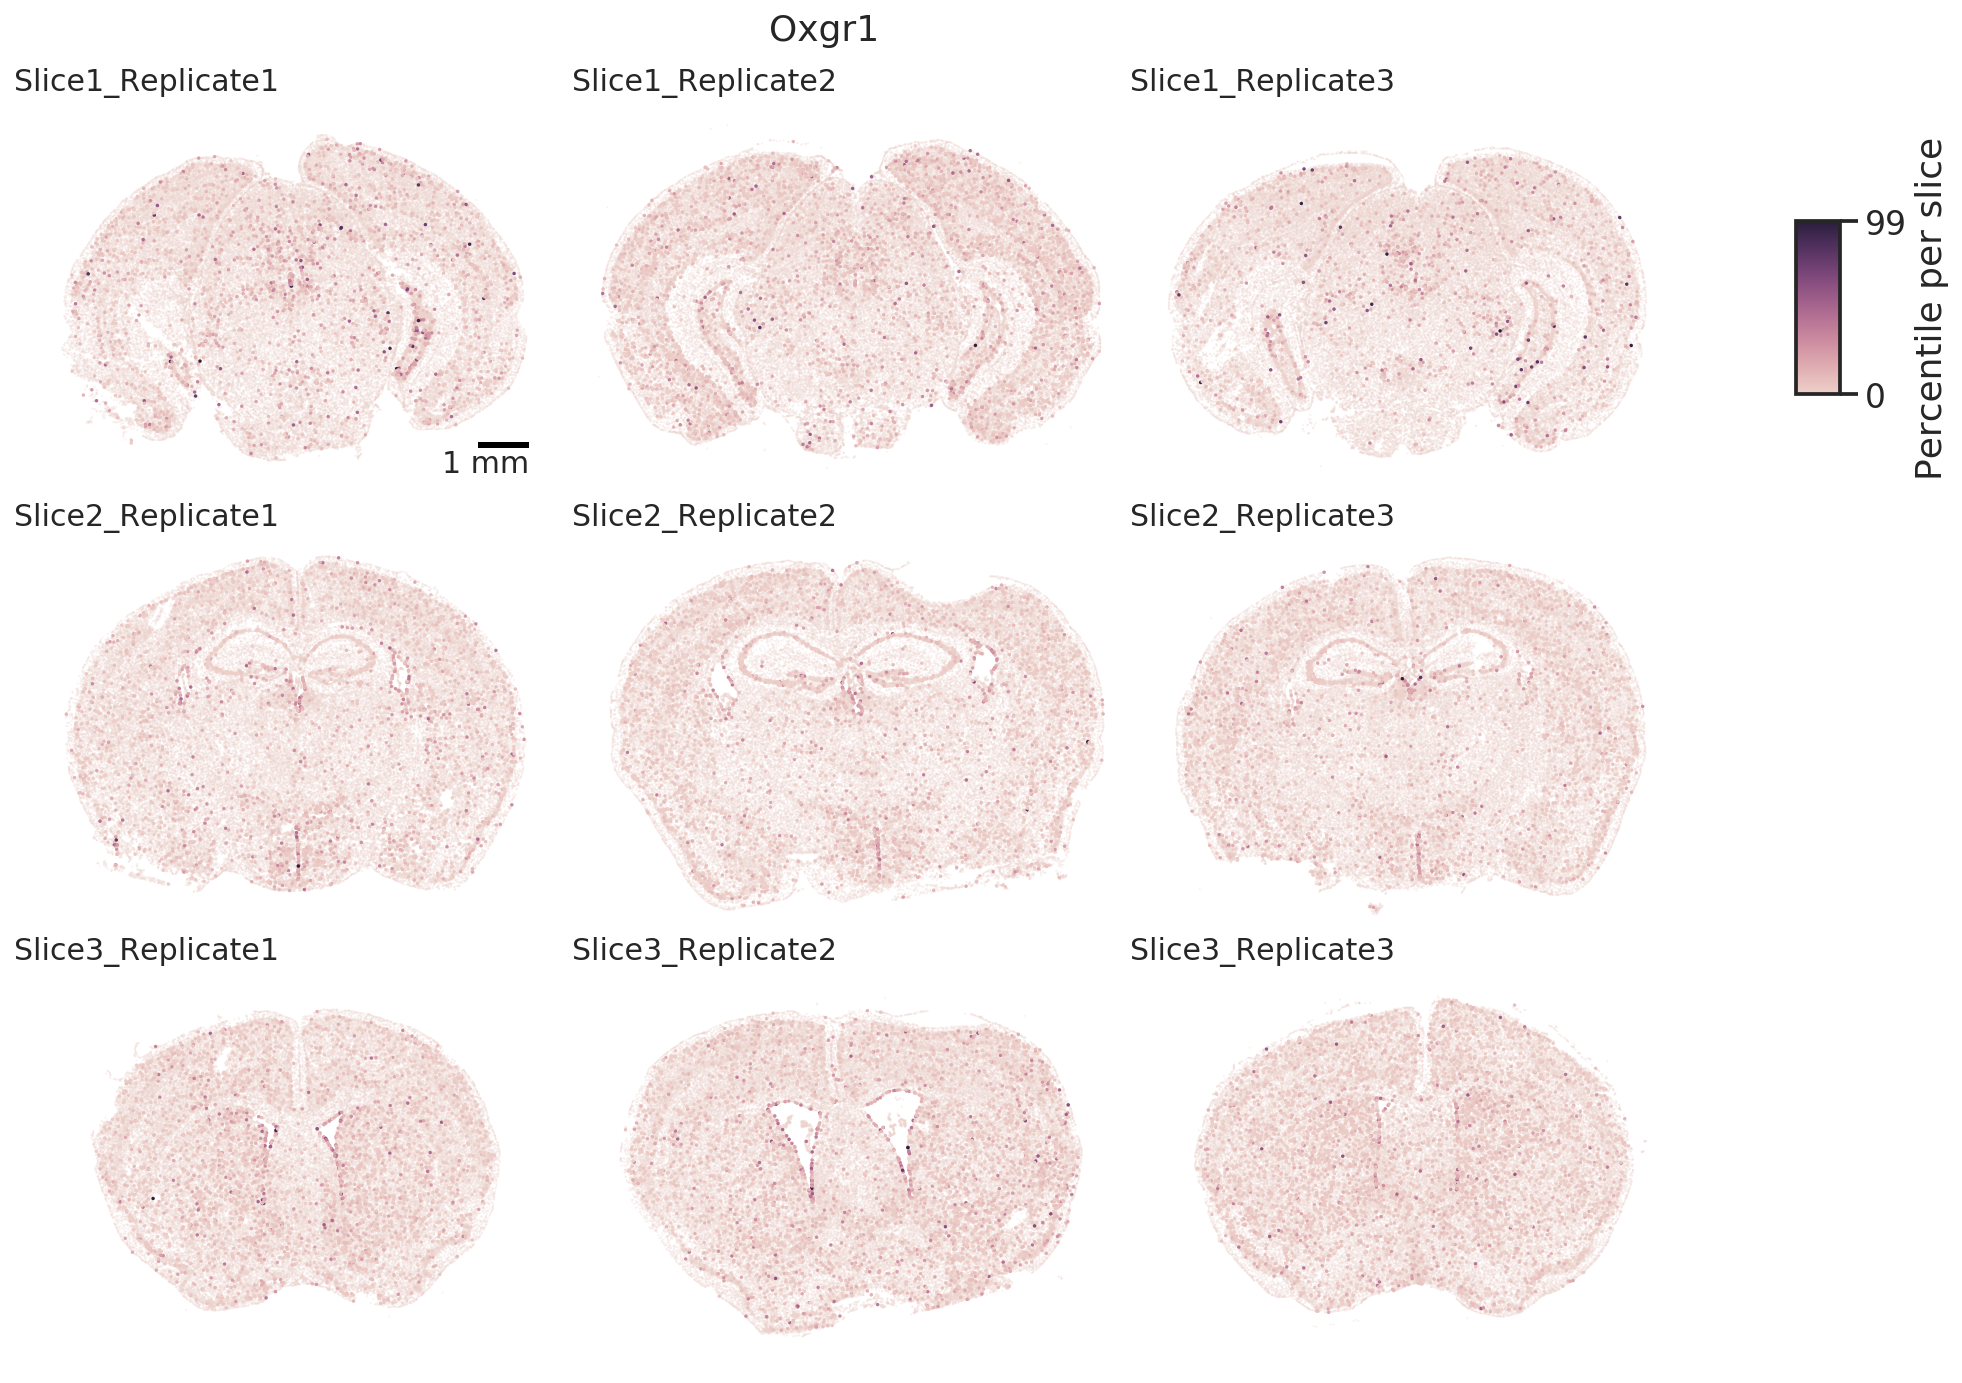

In [39]:
ti = time.time()
for gene in tqdm.tqdm(genes):
    output = results.format(gene+".png")
    close = True
    output = ''
    close = False
    plot_FISH(data, gene, output, close=close)
    print(time.time()-ti)
    break

In [ ]:
ti = time.time()
for gene in tqdm.tqdm(genes):
    output = results.format(gene+".png")
    close = True
    plot_FISH(data, gene, output, close=close)
    print(time.time()-ti)

  0%|          | 0/483 [00:00<?, ?it/s]

./results/2021-05-01_Oxgr1.png


  0%|          | 1/483 [00:29<3:53:07, 29.02s/it]

29.02599000930786
./results/2021-05-01_Htr1a.png


  0%|          | 2/483 [00:59<3:56:45, 29.53s/it]

59.75805330276489
./results/2021-05-01_Htr1b.png


  1%|          | 3/483 [01:32<4:03:05, 30.39s/it]

92.13362908363342
./results/2021-05-01_Htr1d.png


  1%|          | 4/483 [02:00<3:58:20, 29.86s/it]

120.75312066078186
./results/2021-05-01_Htr1f.png


  1%|          | 5/483 [02:31<4:01:09, 30.27s/it]

151.9943425655365
./results/2021-05-01_Htr2a.png


  1%|          | 6/483 [03:02<4:01:19, 30.36s/it]

182.546133518219
./results/2021-05-01_Htr2b.png


  1%|▏         | 7/483 [03:29<3:53:23, 29.42s/it]

209.7829692363739
./results/2021-05-01_Htr2c.png


  2%|▏         | 8/483 [04:01<3:58:19, 30.10s/it]

241.48088431358337
./results/2021-05-01_Htr4.png


  2%|▏         | 9/483 [04:32<3:59:37, 30.33s/it]

272.34787034988403
./results/2021-05-01_Htr5a.png


  2%|▏         | 10/483 [05:05<4:05:34, 31.15s/it]

305.4082679748535
./results/2021-05-01_Htr5b.png


  2%|▏         | 11/483 [05:34<3:59:58, 30.51s/it]

334.4070909023285
./results/2021-05-01_Htr6.png


  2%|▏         | 12/483 [06:04<3:58:47, 30.42s/it]

364.6235554218292
./results/2021-05-01_Htr7.png


  3%|▎         | 13/483 [06:36<4:00:39, 30.72s/it]

396.05531311035156
./results/2021-05-01_Adora1.png


  3%|▎         | 14/483 [07:15<4:19:56, 33.26s/it]

435.22019052505493
./results/2021-05-01_Adora2a.png


  3%|▎         | 15/483 [07:44<4:10:48, 32.15s/it]

464.8047082424164
./results/2021-05-01_Adora2b.png


  3%|▎         | 16/483 [08:13<4:01:46, 31.06s/it]

493.3199543952942
./results/2021-05-01_Adora3.png


  4%|▎         | 17/483 [08:40<3:52:10, 29.89s/it]

520.485499382019
./results/2021-05-01_Adgra1.png


  4%|▎         | 18/483 [09:16<4:06:33, 31.81s/it]

556.7835927009583
./results/2021-05-01_Adgra2.png


  4%|▍         | 19/483 [10:09<4:54:19, 38.06s/it]

609.412789106369
./results/2021-05-01_Adgra3.png


  4%|▍         | 20/483 [10:41<4:40:48, 36.39s/it]

641.9090459346771
./results/2021-05-01_Adgrb1.png


  4%|▍         | 21/483 [11:23<4:53:16, 38.09s/it]

683.9603800773621
./results/2021-05-01_Adgrb3.png


  5%|▍         | 22/483 [12:04<4:58:54, 38.90s/it]

724.7640645503998
./results/2021-05-01_Adgre1.png


  5%|▍         | 23/483 [12:35<4:39:56, 36.51s/it]

755.7042717933655
./results/2021-05-01_Adgre4.png


  5%|▍         | 24/483 [13:03<4:18:59, 33.85s/it]

783.3533537387848
./results/2021-05-01_Adgrf4.png


  5%|▌         | 25/483 [13:32<4:06:36, 32.31s/it]

812.0509994029999
./results/2021-05-01_Adgrf5.png


  5%|▌         | 26/483 [14:01<3:59:13, 31.41s/it]

841.36172747612
./results/2021-05-01_Adgrl1.png


  6%|▌         | 27/483 [14:45<4:26:51, 35.11s/it]

885.1149418354034
./results/2021-05-01_Adgrl2.png


  6%|▌         | 28/483 [15:23<4:34:47, 36.24s/it]

923.9720690250397
./results/2021-05-01_Adgrl3.png


  6%|▌         | 29/483 [16:02<4:39:04, 36.88s/it]

962.3642206192017
./results/2021-05-01_Adgrl4.png


  6%|▌         | 30/483 [16:31<4:21:26, 34.63s/it]

991.7277054786682
./results/2021-05-01_Adgrd1.png


  6%|▋         | 31/483 [16:59<4:06:16, 32.69s/it]

1019.9054989814758
./results/2021-05-01_Adgrf1.png


  7%|▋         | 32/483 [17:27<3:53:40, 31.09s/it]

1047.2470214366913
./results/2021-05-01_Adgrf2.png


  7%|▋         | 33/483 [17:55<3:47:39, 30.36s/it]

1075.895812034607
./results/2021-05-01_ADGRF3.png


  7%|▋         | 34/483 [18:22<3:39:01, 29.27s/it]

1102.6254246234894
./results/2021-05-01_Adgrg1.png


  7%|▋         | 35/483 [18:59<3:56:38, 31.69s/it]

1139.9797122478485
./results/2021-05-01_Adgrg2.png


  7%|▋         | 36/483 [19:28<3:48:59, 30.74s/it]

1168.4887766838074
./results/2021-05-01_Adgrg4.png


  8%|▊         | 37/483 [19:55<3:40:47, 29.70s/it]

1195.775182723999
./results/2021-05-01_Adgrg5.png


  8%|▊         | 38/483 [20:22<3:34:15, 28.89s/it]

1222.7646734714508
./results/2021-05-01_Adgrg6.png


  8%|▊         | 39/483 [20:52<3:34:59, 29.05s/it]

1252.2039914131165
./results/2021-05-01_Adgrg7.png


  8%|▊         | 40/483 [21:18<3:29:14, 28.34s/it]

1278.8773095607758
./results/2021-05-01_Adgrv1.png


  8%|▊         | 41/483 [21:45<3:26:01, 27.97s/it]

1305.9718220233917
./results/2021-05-01_Mc2r.png


  9%|▊         | 42/483 [22:12<3:23:01, 27.62s/it]

1332.7916188240051
./results/2021-05-01_Adra1a.png


  9%|▉         | 43/483 [22:43<3:30:12, 28.67s/it]

1363.8904876708984
./results/2021-05-01_Adra1b.png


  9%|▉         | 44/483 [23:14<3:33:06, 29.13s/it]

1394.0951325893402
./results/2021-05-01_Adra1d.png


  9%|▉         | 45/483 [23:46<3:40:00, 30.14s/it]

1426.5890791416168
./results/2021-05-01_Adra2a.png


 10%|▉         | 46/483 [24:19<3:45:34, 30.97s/it]

1459.5068695545197
./results/2021-05-01_Adra2b.png


 10%|▉         | 47/483 [24:48<3:41:32, 30.49s/it]

1488.8639459609985
./results/2021-05-01_Adra2c.png


 10%|▉         | 48/483 [25:16<3:34:01, 29.52s/it]

1516.1309478282928
./results/2021-05-01_Aplnr.png


 10%|█         | 49/483 [25:43<3:28:00, 28.76s/it]

1543.1006753444672
./results/2021-05-01_Ackr1.png


 10%|█         | 50/483 [26:20<3:46:17, 31.36s/it]

1580.5304596424103
./results/2021-05-01_Ackr2.png


 11%|█         | 51/483 [26:50<3:43:19, 31.02s/it]

1610.7508342266083
./results/2021-05-01_Ackr3.png


 11%|█         | 52/483 [27:21<3:43:14, 31.08s/it]

1641.968255519867
./results/2021-05-01_Ackr4.png


 11%|█         | 53/483 [27:48<3:32:14, 29.62s/it]

1668.1747887134552
./results/2021-05-01_Bdkrb1.png


 11%|█         | 54/483 [28:14<3:25:29, 28.74s/it]

1694.8712935447693
./results/2021-05-01_Bdkrb2.png


 11%|█▏        | 55/483 [28:42<3:22:26, 28.38s/it]

1722.4079806804657
./results/2021-05-01_Adrb1.png


 12%|█▏        | 56/483 [29:19<3:40:54, 31.04s/it]

1759.6626126766205
./results/2021-05-01_Adrb2.png


 12%|█▏        | 57/483 [29:48<3:34:50, 30.26s/it]

1788.0994565486908
./results/2021-05-01_Adrb3.png


 12%|█▏        | 58/483 [30:15<3:27:21, 29.27s/it]

1815.071224451065
./results/2021-05-01_Brs3.png


 12%|█▏        | 59/483 [30:42<3:23:22, 28.78s/it]

1842.6969854831696
./results/2021-05-01_Ccr1l1.png


 12%|█▏        | 60/483 [31:09<3:19:16, 28.27s/it]

1869.7652781009674
./results/2021-05-01_Ccr1.png


 13%|█▎        | 61/483 [31:39<3:21:50, 28.70s/it]

1899.4739348888397
./results/2021-05-01_Ccr10.png


 13%|█▎        | 62/483 [32:06<3:17:53, 28.20s/it]

1926.516849040985
./results/2021-05-01_Ccr2.png


 13%|█▎        | 63/483 [32:35<3:18:36, 28.37s/it]

1955.291163444519
./results/2021-05-01_Ccr4.png


 13%|█▎        | 64/483 [33:02<3:14:54, 27.91s/it]

1982.1199567317963
./results/2021-05-01_Ccr6.png


 13%|█▎        | 65/483 [33:29<3:12:59, 27.70s/it]

2009.3368120193481
./results/2021-05-01_Ccr7.png


 14%|█▎        | 66/483 [33:56<3:11:53, 27.61s/it]

2036.734747171402
./results/2021-05-01_Ccr8.png


 14%|█▍        | 67/483 [34:23<3:09:15, 27.30s/it]

2063.2987546920776
./results/2021-05-01_Ccr9.png


 14%|█▍        | 68/483 [34:50<3:08:23, 27.24s/it]

2090.3954577445984
./results/2021-05-01_Ccrl2.png


 14%|█▍        | 69/483 [35:17<3:07:58, 27.24s/it]

2117.6528096199036
./results/2021-05-01_Cxcr1.png


 14%|█▍        | 70/483 [35:44<3:07:37, 27.26s/it]

2144.9438416957855
./results/2021-05-01_Cxcr2.png


 15%|█▍        | 71/483 [36:12<3:07:53, 27.36s/it]

2172.5492782592773
./results/2021-05-01_Cxcr3.png


 15%|█▍        | 72/483 [36:39<3:05:50, 27.13s/it]

2199.1426072120667
./results/2021-05-01_Cxcr4.png


 15%|█▌        | 73/483 [37:06<3:06:08, 27.24s/it]

2226.6389179229736
./results/2021-05-01_Cxcr5.png


 15%|█▌        | 74/483 [37:33<3:05:00, 27.14s/it]

2253.548528432846
./results/2021-05-01_Cxcr6.png


 16%|█▌        | 75/483 [38:00<3:04:22, 27.11s/it]

2280.6003811359406
./results/2021-05-01_C3ar1.png


 16%|█▌        | 76/483 [38:28<3:05:58, 27.42s/it]

2308.7215790748596
./results/2021-05-01_C5ar1.png


 16%|█▌        | 77/483 [38:56<3:06:00, 27.49s/it]

2336.3755264282227
./results/2021-05-01_C5ar2.png


 16%|█▌        | 78/483 [39:23<3:05:48, 27.53s/it]

2363.9937443733215
./results/2021-05-01_Celsr1.png


 16%|█▋        | 79/483 [39:54<3:12:02, 28.52s/it]

2394.8328495025635
./results/2021-05-01_Celsr2.png


 17%|█▋        | 80/483 [40:36<3:38:18, 32.50s/it]

2436.6270349025726
./results/2021-05-01_Celsr3.png


 17%|█▋        | 81/483 [41:11<3:41:46, 33.10s/it]

2471.1271166801453
./results/2021-05-01_Calcrl.png


 17%|█▋        | 82/483 [41:40<3:33:15, 31.91s/it]

2500.2493889331818
./results/2021-05-01_Calcr.png


 17%|█▋        | 83/483 [42:07<3:23:41, 30.55s/it]

2527.6450197696686
./results/2021-05-01_Cnr1.png


 17%|█▋        | 84/483 [42:44<3:34:58, 32.33s/it]

2564.1073517799377
./results/2021-05-01_Cnr2.png


 18%|█▊        | 85/483 [43:11<3:24:55, 30.89s/it]

2591.6589257717133
./results/2021-05-01_Xcr1.png


 18%|█▊        | 86/483 [43:38<3:16:22, 29.68s/it]

2618.500172138214
./results/2021-05-01_Cmklr1.png


 18%|█▊        | 87/483 [44:07<3:14:54, 29.53s/it]

2647.688581228256
./results/2021-05-01_Cckar.png


 18%|█▊        | 88/483 [44:35<3:10:24, 28.92s/it]

2675.1872918605804
./results/2021-05-01_Crhr1.png


 18%|█▊        | 89/483 [45:08<3:19:29, 30.38s/it]

2708.968734741211
./results/2021-05-01_Crhr2.png


 19%|█▊        | 90/483 [45:36<3:13:54, 29.60s/it]

2736.763889312744
./results/2021-05-01_Cx3cr1.png


 19%|█▉        | 91/483 [46:07<3:15:49, 29.97s/it]

2767.59499335289
./results/2021-05-01_Cysltr1.png


 19%|█▉        | 92/483 [46:34<3:10:14, 29.19s/it]

2794.9725439548492
./results/2021-05-01_Cysltr2.png


 19%|█▉        | 93/483 [47:03<3:07:47, 28.89s/it]

2823.157562017441
./results/2021-05-01_Drd1.png


 19%|█▉        | 94/483 [47:35<3:13:35, 29.86s/it]

2855.2749485969543
./results/2021-05-01_Drd5.png


 20%|█▉        | 95/483 [48:04<3:11:29, 29.61s/it]

2884.314416408539
./results/2021-05-01_Drd2.png


 20%|█▉        | 96/483 [48:34<3:12:52, 29.90s/it]

2914.8971977233887
./results/2021-05-01_Drd3.png


 20%|██        | 97/483 [49:04<3:12:00, 29.84s/it]

2944.604100704193
./results/2021-05-01_Drd4.png


 20%|██        | 98/483 [49:31<3:05:26, 28.90s/it]

2971.295755624771
./results/2021-05-01_Oprd1.png


 20%|██        | 99/483 [50:02<3:09:07, 29.55s/it]

3002.366063594818
./results/2021-05-01_Ednrb.png


 21%|██        | 100/483 [50:37<3:18:38, 31.12s/it]

3037.142534971237
./results/2021-05-01_Ednra.png


 21%|██        | 101/483 [51:06<3:13:51, 30.45s/it]

3066.026088953018
./results/2021-05-01_Casr.png


 21%|██        | 102/483 [51:33<3:07:57, 29.60s/it]

3093.6508078575134
./results/2021-05-01_Fpr1.png


 21%|██▏       | 103/483 [52:01<3:04:39, 29.16s/it]

3121.7751944065094
./results/2021-05-01_Fshr.png


 22%|██▏       | 104/483 [52:28<3:00:29, 28.57s/it]

3148.983540058136
./results/2021-05-01_Fpr-s1.png


 22%|██▏       | 105/483 [52:56<2:58:44, 28.37s/it]

3176.883661031723
./results/2021-05-01_Fpr-rs3.png


 22%|██▏       | 106/483 [53:24<2:56:57, 28.16s/it]

3204.5602309703827
./results/2021-05-01_Ffar1.png


 22%|██▏       | 107/483 [53:51<2:54:12, 27.80s/it]

3231.51309967041
./results/2021-05-01_Ffar3.png


 22%|██▏       | 108/483 [54:18<2:52:27, 27.59s/it]

3258.623608827591
./results/2021-05-01_Ffar4.png


 23%|██▎       | 109/483 [54:46<2:53:25, 27.82s/it]

3286.9774792194366
./results/2021-05-01_Fzd1.png


 23%|██▎       | 110/483 [55:18<2:59:45, 28.92s/it]

3318.4493470191956
./results/2021-05-01_Fzd10.png


 23%|██▎       | 111/483 [55:46<2:56:55, 28.54s/it]

3346.0954360961914
./results/2021-05-01_Fzd2.png


 23%|██▎       | 112/483 [56:15<2:58:16, 28.83s/it]

3375.6214871406555
./results/2021-05-01_Fzd3.png


 23%|██▎       | 113/483 [56:55<3:19:09, 32.30s/it]

3415.998250246048
./results/2021-05-01_Fzd4.png


 24%|██▎       | 114/483 [57:24<3:12:23, 31.28s/it]

3444.9177062511444
./results/2021-05-01_Fzd5.png


 24%|██▍       | 115/483 [57:53<3:07:00, 30.49s/it]

3473.5616760253906
./results/2021-05-01_Fzd6.png


 24%|██▍       | 116/483 [58:23<3:06:20, 30.46s/it]

3503.9628551006317
./results/2021-05-01_Fzd7.png


 24%|██▍       | 117/483 [58:52<3:03:09, 30.03s/it]

3532.9671709537506
./results/2021-05-01_Fzd8.png


 24%|██▍       | 118/483 [59:24<3:04:59, 30.41s/it]

3564.268063545227
./results/2021-05-01_Fzd9.png


 25%|██▍       | 119/483 [59:52<3:00:51, 29.81s/it]

3592.6905722618103
./results/2021-05-01_Gpbar1.png


 25%|██▍       | 120/483 [1:00:19<2:55:48, 29.06s/it]

3619.988874912262
./results/2021-05-01_Gper1.png


 25%|██▌       | 121/483 [1:00:48<2:53:58, 28.84s/it]

3648.3090195655823
./results/2021-05-01_Gpr1.png


 25%|██▌       | 122/483 [1:01:15<2:49:53, 28.24s/it]

3675.1428067684174
./results/2021-05-01_Gpr135.png


 25%|██▌       | 123/483 [1:01:48<2:57:56, 29.66s/it]

3708.1153571605682
./results/2021-05-01_Gpr143.png


 26%|██▌       | 124/483 [1:02:16<2:54:35, 29.18s/it]

3736.1827359199524
./results/2021-05-01_Gpr15.png


 26%|██▌       | 125/483 [1:02:44<2:52:04, 28.84s/it]

3764.2233164310455
./results/2021-05-01_Gpr157.png


 26%|██▌       | 126/483 [1:03:13<2:52:54, 29.06s/it]

3793.7997381687164
./results/2021-05-01_Gpr161.png


 26%|██▋       | 127/483 [1:03:48<3:03:09, 30.87s/it]

3828.890739440918
./results/2021-05-01_Gpr176.png


 27%|██▋       | 128/483 [1:04:20<3:03:25, 31.00s/it]

3860.201561689377
./results/2021-05-01_Gpr182.png


 27%|██▋       | 129/483 [1:04:49<2:59:13, 30.38s/it]

3889.123794078827
./results/2021-05-01_Gpr183.png


 27%|██▋       | 130/483 [1:05:16<2:53:32, 29.50s/it]

3916.567192554474
./results/2021-05-01_Gpr20.png


 27%|██▋       | 131/483 [1:05:44<2:50:46, 29.11s/it]

3944.7750046253204
./results/2021-05-01_Gpr22.png


 27%|██▋       | 132/483 [1:06:19<3:00:42, 30.89s/it]

3979.814929008484
./results/2021-05-01_Gpr26.png


 28%|██▊       | 133/483 [1:06:55<3:09:02, 32.41s/it]

4015.7678773403168
./results/2021-05-01_Gpr3.png


 28%|██▊       | 134/483 [1:07:24<3:02:49, 31.43s/it]

4044.922362804413
./results/2021-05-01_Gpr37l1.png


 28%|██▊       | 135/483 [1:08:01<3:10:56, 32.92s/it]

4081.3168375492096
./results/2021-05-01_Gpr39.png


 28%|██▊       | 136/483 [1:08:29<3:01:51, 31.45s/it]

4109.318420648575
./results/2021-05-01_Gpr4.png


 28%|██▊       | 137/483 [1:08:57<2:56:12, 30.56s/it]

4137.799200057983
./results/2021-05-01_Gpr52.png


 29%|██▊       | 138/483 [1:09:31<3:01:49, 31.62s/it]

4171.907375097275
./results/2021-05-01_Gpr55.png


 29%|██▉       | 139/483 [1:09:59<2:53:54, 30.33s/it]

4199.2239401340485
./results/2021-05-01_Gpr6.png


 29%|██▉       | 140/483 [1:10:27<2:50:12, 29.77s/it]

4227.7007784843445
./results/2021-05-01_Gpr61.png


 29%|██▉       | 141/483 [1:11:02<2:58:29, 31.31s/it]

4262.611270904541
./results/2021-05-01_Gpr62.png


 29%|██▉       | 142/483 [1:11:34<2:58:40, 31.44s/it]

4294.334029197693
./results/2021-05-01_Gpr84.png


 30%|██▉       | 143/483 [1:12:01<2:51:35, 30.28s/it]

4321.919664621353
./results/2021-05-01_Gpr87.png


 30%|██▉       | 144/483 [1:12:29<2:45:56, 29.37s/it]

4349.158022403717
./results/2021-05-01_Gprc5b.png


 30%|███       | 145/483 [1:13:08<3:01:36, 32.24s/it]

4388.096601963043
./results/2021-05-01_Gprc5c.png


 30%|███       | 146/483 [1:13:36<2:54:24, 31.05s/it]

4416.378010749817
./results/2021-05-01_Gprc5d.png


 30%|███       | 147/483 [1:14:04<2:49:10, 30.21s/it]

4444.624666213989
./results/2021-05-01_Gprc6a.png


 31%|███       | 148/483 [1:14:31<2:42:44, 29.15s/it]

4471.2912476062775
./results/2021-05-01_Galr1.png


 31%|███       | 149/483 [1:15:00<2:42:47, 29.24s/it]

4500.75924038887
./results/2021-05-01_Galr2.png


 31%|███       | 150/483 [1:15:28<2:39:03, 28.66s/it]

4528.055188655853
./results/2021-05-01_Gabbr1.png


 31%|███▏      | 151/483 [1:16:15<3:09:48, 34.30s/it]

4575.528616428375
./results/2021-05-01_Gabbr2.png


 31%|███▏      | 152/483 [1:16:57<3:21:55, 36.60s/it]

4617.493809938431
./results/2021-05-01_Gipr.png


 32%|███▏      | 153/483 [1:17:24<3:06:16, 33.87s/it]

4644.978603363037
./results/2021-05-01_Grpr.png


 32%|███▏      | 154/483 [1:17:47<2:47:30, 30.55s/it]

4667.787945985794
./results/2021-05-01_Cckbr.png


 32%|███▏      | 155/483 [1:18:09<2:33:05, 28.01s/it]

4689.855929374695
./results/2021-05-01_Gcgr.png


 32%|███▏      | 156/483 [1:18:26<2:13:50, 24.56s/it]

4706.373351812363
./results/2021-05-01_Glp1r.png


 33%|███▎      | 157/483 [1:18:42<1:59:52, 22.06s/it]

4722.609357833862
./results/2021-05-01_Glp2r.png


 33%|███▎      | 158/483 [1:18:58<1:49:17, 20.18s/it]

4738.387357234955
./results/2021-05-01_Gpr119.png


 33%|███▎      | 159/483 [1:19:13<1:41:22, 18.77s/it]

4753.88430929184
./results/2021-05-01_Gnrhr.png


 33%|███▎      | 160/483 [1:19:31<1:39:08, 18.42s/it]

4771.467113018036
./results/2021-05-01_Ghsr.png


 33%|███▎      | 161/483 [1:19:47<1:34:14, 17.56s/it]

4787.029647111893
./results/2021-05-01_Ghrhr.png


 34%|███▎      | 162/483 [1:20:02<1:31:19, 17.07s/it]

4802.960593700409
./results/2021-05-01_Hrh1.png


 34%|███▎      | 163/483 [1:20:20<1:31:53, 17.23s/it]

4820.557594776154
./results/2021-05-01_Hrh2.png


 34%|███▍      | 164/483 [1:20:38<1:32:06, 17.32s/it]

4838.100219964981
./results/2021-05-01_Hrh3.png


 34%|███▍      | 165/483 [1:20:57<1:34:47, 17.89s/it]

4857.302198648453
./results/2021-05-01_Hrh4.png


 34%|███▍      | 166/483 [1:21:12<1:30:43, 17.17s/it]

4872.805475950241
./results/2021-05-01_Hcar1.png


 35%|███▍      | 167/483 [1:21:28<1:27:58, 16.70s/it]

4888.415391921997
./results/2021-05-01_Hcar2.png


 35%|███▍      | 168/483 [1:21:44<1:25:59, 16.38s/it]

4904.0386509895325
./results/2021-05-01_Oprk1.png


 35%|███▍      | 169/483 [1:22:00<1:25:36, 16.36s/it]

4920.346842765808
./results/2021-05-01_Kiss1r.png


 35%|███▌      | 170/483 [1:22:16<1:25:19, 16.36s/it]

4936.703667163849
./results/2021-05-01_Lgr4.png


 35%|███▌      | 171/483 [1:22:36<1:29:41, 17.25s/it]

4956.031120300293
./results/2021-05-01_Lgr5.png


 36%|███▌      | 172/483 [1:22:52<1:28:06, 17.00s/it]

4972.448850870132
./results/2021-05-01_Lgr6.png


 36%|███▌      | 173/483 [1:23:07<1:25:27, 16.54s/it]

4987.914272785187
./results/2021-05-01_Ltb4r.png


 36%|███▌      | 174/483 [1:23:23<1:22:57, 16.11s/it]

5003.013809204102
./results/2021-05-01_Ltb4r2.png


 36%|███▌      | 175/483 [1:23:38<1:22:14, 16.02s/it]

5018.836957216263
./results/2021-05-01_Lhcgr.png


 36%|███▋      | 176/483 [1:23:54<1:21:15, 15.88s/it]

5034.387628078461
./results/2021-05-01_Lpar1.png


 37%|███▋      | 177/483 [1:24:11<1:23:21, 16.34s/it]

5051.8159737586975
./results/2021-05-01_Lpar2.png


 37%|███▋      | 178/483 [1:24:27<1:22:22, 16.21s/it]

5067.698269844055
./results/2021-05-01_Lpar3.png


 37%|███▋      | 179/483 [1:24:43<1:20:58, 15.98s/it]

5083.159738063812
./results/2021-05-01_Lpar4.png


 37%|███▋      | 180/483 [1:24:59<1:20:36, 15.96s/it]

5099.0726182460785
./results/2021-05-01_Lpar6.png


 37%|███▋      | 181/483 [1:25:15<1:21:19, 16.16s/it]

5115.681758642197
./results/2021-05-01_Mrgpra3.png


 38%|███▊      | 182/483 [1:25:31<1:20:08, 15.97s/it]

5131.231277704239
./results/2021-05-01_Mrgprb1.png


 38%|███▊      | 183/483 [1:25:46<1:19:03, 15.81s/it]

5146.662917137146
./results/2021-05-01_Mrgprb2.png


 38%|███▊      | 184/483 [1:26:02<1:18:19, 15.72s/it]

5162.161582708359
./results/2021-05-01_Mrgprb4.png


 38%|███▊      | 185/483 [1:26:17<1:18:14, 15.75s/it]

5177.9986436367035
./results/2021-05-01_Mrgprb5.png


 39%|███▊      | 186/483 [1:26:33<1:18:10, 15.79s/it]

5193.882417917252
./results/2021-05-01_Mrgprb8.png


 39%|███▊      | 187/483 [1:26:49<1:17:46, 15.76s/it]

5209.582494735718
./results/2021-05-01_Mrgprd.png


 39%|███▉      | 188/483 [1:27:05<1:17:03, 15.67s/it]

5225.046078681946
./results/2021-05-01_Mrgpre.png


 39%|███▉      | 189/483 [1:27:21<1:18:12, 15.96s/it]

5241.673254966736
./results/2021-05-01_Mrgprf.png


 39%|███▉      | 190/483 [1:27:37<1:17:04, 15.78s/it]

5257.039924860001
./results/2021-05-01_Mrgprg.png


 40%|███▉      | 191/483 [1:27:52<1:16:52, 15.80s/it]

5272.871144294739
./results/2021-05-01_Mrgprh.png


 40%|███▉      | 192/483 [1:28:08<1:16:24, 15.75s/it]

5288.521199703217
./results/2021-05-01_Mrgprx2.png


 40%|███▉      | 193/483 [1:28:24<1:16:01, 15.73s/it]

5304.200817346573
./results/2021-05-01_Mchr1.png


 40%|████      | 194/483 [1:28:41<1:18:34, 16.31s/it]

5321.8758499622345
./results/2021-05-01_Mc3r.png


 40%|████      | 195/483 [1:28:57<1:17:33, 16.16s/it]

5337.669734239578
./results/2021-05-01_Mc4r.png


 41%|████      | 196/483 [1:29:18<1:23:26, 17.45s/it]

5358.118852376938
./results/2021-05-01_Mc5r.png


 41%|████      | 197/483 [1:29:47<1:40:01, 20.99s/it]

5387.363069534302
./results/2021-05-01_Opn4.png


 41%|████      | 198/483 [1:30:14<1:48:38, 22.87s/it]

5414.635926485062
./results/2021-05-01_Mtnr1a.png


 41%|████      | 199/483 [1:30:42<1:55:57, 24.50s/it]

5442.932524204254
./results/2021-05-01_Mtnr1b.png


 41%|████▏     | 200/483 [1:31:15<2:06:46, 26.88s/it]

5475.3598709106445
./results/2021-05-01_Gpr50.png


 42%|████▏     | 201/483 [1:31:44<2:09:01, 27.45s/it]

5504.148713588715
./results/2021-05-01_Grm1.png


 42%|████▏     | 202/483 [1:32:20<2:21:33, 30.23s/it]

5540.847712993622
./results/2021-05-01_Grm2.png


 42%|████▏     | 203/483 [1:32:53<2:25:08, 31.10s/it]

5573.995368719101
./results/2021-05-01_Grm3.png


 42%|████▏     | 204/483 [1:33:35<2:39:04, 34.21s/it]

5615.458192110062
./results/2021-05-01_Grm4.png


 42%|████▏     | 205/483 [1:34:14<2:44:47, 35.57s/it]

5654.191465377808
./results/2021-05-01_Grm5.png


 43%|████▎     | 206/483 [1:34:54<2:51:10, 37.08s/it]

5694.792124986649
./results/2021-05-01_Grm6.png


 43%|████▎     | 207/483 [1:35:23<2:38:24, 34.43s/it]

5723.0615446567535
./results/2021-05-01_Grm7.png


 43%|████▎     | 208/483 [1:36:02<2:44:37, 35.92s/it]

5762.445840597153
./results/2021-05-01_Oprm1.png


 43%|████▎     | 209/483 [1:36:34<2:38:44, 34.76s/it]

5794.503812074661
./results/2021-05-01_Chrm1.png


 43%|████▎     | 210/483 [1:37:11<2:41:46, 35.56s/it]

5831.914877414703
./results/2021-05-01_Chrm2.png


 44%|████▎     | 211/483 [1:37:42<2:34:12, 34.02s/it]

5862.3424298763275
./results/2021-05-01_Chrm3.png


 44%|████▍     | 212/483 [1:38:18<2:36:38, 34.68s/it]

5898.565801382065
./results/2021-05-01_Chrm4.png


 44%|████▍     | 213/483 [1:38:53<2:36:08, 34.70s/it]

5933.311608076096
./results/2021-05-01_Chrm5.png


 44%|████▍     | 214/483 [1:39:21<2:26:54, 32.77s/it]

5961.574193239212
./results/2021-05-01_Gpr18.png


 45%|████▍     | 215/483 [1:39:49<2:19:43, 31.28s/it]

5989.386101007462
./results/2021-05-01_Nmbr.png


 45%|████▍     | 216/483 [1:40:17<2:14:38, 30.26s/it]

6017.256723165512
./results/2021-05-01_Tacr3.png


 45%|████▍     | 217/483 [1:40:45<2:11:56, 29.76s/it]

6045.858893156052
./results/2021-05-01_Nmur2.png


 45%|████▌     | 218/483 [1:41:12<2:07:40, 28.91s/it]

6072.779633760452
./results/2021-05-01_Npffr2.png


 45%|████▌     | 219/483 [1:41:40<2:05:50, 28.60s/it]

6100.664605140686
./results/2021-05-01_Npsr1.png


 46%|████▌     | 220/483 [1:42:09<2:05:31, 28.64s/it]

6129.385618209839
./results/2021-05-01_Npy1r.png


 46%|████▌     | 221/483 [1:42:41<2:09:38, 29.69s/it]

6161.531787395477
./results/2021-05-01_Npy2r.png


 46%|████▌     | 222/483 [1:43:10<2:08:40, 29.58s/it]

6190.856745481491
./results/2021-05-01_Npy4r.png


 46%|████▌     | 223/483 [1:43:38<2:05:49, 29.04s/it]

6218.626343488693
./results/2021-05-01_Npy6r.png


 46%|████▋     | 224/483 [1:44:07<2:04:53, 28.93s/it]

6247.309423446655
./results/2021-05-01_Npbwr1.png


 47%|████▋     | 225/483 [1:44:35<2:03:02, 28.61s/it]

6275.179882764816
./results/2021-05-01_Ntsr1.png


 47%|████▋     | 226/483 [1:45:02<2:00:36, 28.16s/it]

6302.271474599838
./results/2021-05-01_Ntsr2.png


 47%|████▋     | 227/483 [1:45:39<2:12:13, 30.99s/it]

6339.872541189194
./results/2021-05-01_Opn3.png


 47%|████▋     | 228/483 [1:46:10<2:10:39, 30.74s/it]

6370.041918039322
./results/2021-05-01_Opn5.png


 47%|████▋     | 229/483 [1:46:37<2:06:10, 29.81s/it]

6397.661753892899
./results/2021-05-01_Hcrtr1.png


 48%|████▊     | 230/483 [1:47:05<2:02:48, 29.12s/it]

6425.190122842789
./results/2021-05-01_Hcrtr2.png


 48%|████▊     | 231/483 [1:47:34<2:02:13, 29.10s/it]

6454.24236536026
./results/2021-05-01_Oxtr.png


 48%|████▊     | 232/483 [1:48:03<2:01:46, 29.11s/it]

6483.373597145081
./results/2021-05-01_P2ry1.png


 48%|████▊     | 233/483 [1:48:33<2:02:31, 29.40s/it]

6513.462720870972
./results/2021-05-01_P2ry12.png


 48%|████▊     | 234/483 [1:49:04<2:03:28, 29.75s/it]

6544.02867937088
./results/2021-05-01_P2yr13.png


 49%|████▊     | 235/483 [1:49:33<2:03:15, 29.82s/it]

6574.002930164337
./results/2021-05-01_P2ry14.png


 49%|████▉     | 236/483 [1:50:04<2:03:17, 29.95s/it]

6604.257576942444
./results/2021-05-01_P2ry2.png


 49%|████▉     | 237/483 [1:50:31<1:59:52, 29.24s/it]

6631.837692260742
./results/2021-05-01_P2ry4.png


 49%|████▉     | 238/483 [1:50:59<1:57:08, 28.69s/it]

6659.242662191391
./results/2021-05-01_P2ry6.png


 49%|████▉     | 239/483 [1:51:27<1:56:42, 28.70s/it]

6687.961984395981
./results/2021-05-01_Pth2r.png


 50%|████▉     | 240/483 [1:51:56<1:56:15, 28.71s/it]

6716.689436912537
./results/2021-05-01_Pth1r.png


 50%|████▉     | 241/483 [1:52:25<1:56:10, 28.80s/it]

6745.715276479721
./results/2021-05-01_Adcyap1r1.png


 50%|█████     | 242/483 [1:53:07<2:11:30, 32.74s/it]

6787.642071247101
./results/2021-05-01_Ptafr.png


 50%|█████     | 243/483 [1:53:34<2:04:14, 31.06s/it]

6814.78134059906
./results/2021-05-01_Ccr3.png


 51%|█████     | 244/483 [1:54:02<1:59:52, 30.10s/it]

6842.629626750946
./results/2021-05-01_Gpr101.png


 51%|█████     | 245/483 [1:54:31<1:58:20, 29.84s/it]

6871.856354475021
./results/2021-05-01_Gpr132.png


 51%|█████     | 246/483 [1:55:00<1:56:52, 29.59s/it]

6900.875935077667
./results/2021-05-01_Gpr139.png


 51%|█████     | 247/483 [1:55:30<1:55:59, 29.49s/it]

6930.125564813614
./results/2021-05-01_Gpr141.png


 51%|█████▏    | 248/483 [1:55:58<1:53:52, 29.07s/it]

6958.2356634140015
./results/2021-05-01_Gpr142.png


 52%|█████▏    | 249/483 [1:56:26<1:52:04, 28.74s/it]

6986.183599233627
./results/2021-05-01_Gpr146.png


 52%|█████▏    | 250/483 [1:56:58<1:56:10, 29.92s/it]

7018.851058721542
./results/2021-05-01_Gpr149.png


 52%|█████▏    | 251/483 [1:57:32<2:00:15, 31.10s/it]

7052.72113776207
./results/2021-05-01_Gpr150.png


 52%|█████▏    | 252/483 [1:57:59<1:54:55, 29.85s/it]

7079.655031919479
./results/2021-05-01_Gpr151.png


 52%|█████▏    | 253/483 [1:58:28<1:53:26, 29.60s/it]

7108.652906417847
./results/2021-05-01_Gpr152.png


 53%|█████▎    | 254/483 [1:58:56<1:51:11, 29.13s/it]

7136.709932565689
./results/2021-05-01_Gpr153.png


 53%|█████▎    | 255/483 [1:59:35<2:02:07, 32.14s/it]

7175.853018522263
./results/2021-05-01_Gpr156.png


 53%|█████▎    | 256/483 [2:00:06<1:59:35, 31.61s/it]

7206.237575531006
./results/2021-05-01_Gpr158.png


 53%|█████▎    | 257/483 [2:00:47<2:09:35, 34.41s/it]

7247.165729522705
./results/2021-05-01_Gpr160.png


 53%|█████▎    | 258/483 [2:01:15<2:01:41, 32.45s/it]

7275.051243066788
./results/2021-05-01_Gpr162.png


 54%|█████▎    | 259/483 [2:01:56<2:11:07, 35.12s/it]

7316.4153344631195
./results/2021-05-01_Gpr171.png


 54%|█████▍    | 260/483 [2:02:24<2:02:21, 32.92s/it]

7344.201064586639
./results/2021-05-01_Gpr173.png


 54%|█████▍    | 261/483 [2:02:57<2:02:38, 33.15s/it]

7377.872504234314
./results/2021-05-01_Gpr174.png


 54%|█████▍    | 262/483 [2:03:25<1:55:48, 31.44s/it]

7405.334552764893
./results/2021-05-01_Gpr21.png


 54%|█████▍    | 263/483 [2:04:01<1:59:59, 32.73s/it]

7441.054659366608
./results/2021-05-01_Gpr27.png


 55%|█████▍    | 264/483 [2:04:36<2:02:46, 33.64s/it]

7476.82617521286
./results/2021-05-01_Gpr33.png


 55%|█████▍    | 265/483 [2:05:03<1:54:44, 31.58s/it]

7503.599326372147
./results/2021-05-01_Gpr34.png


 55%|█████▌    | 266/483 [2:05:31<1:49:51, 30.38s/it]

7531.169837474823
./results/2021-05-01_Gpr45.png


 55%|█████▌    | 267/483 [2:06:02<1:50:51, 30.79s/it]

7562.940289735794
./results/2021-05-01_Gpr63.png


 55%|█████▌    | 268/483 [2:06:35<1:52:47, 31.47s/it]

7596.002401590347
./results/2021-05-01_Gpr75.png


 56%|█████▌    | 269/483 [2:07:13<1:58:15, 33.16s/it]

7633.081354856491
./results/2021-05-01_Gpr82.png


 56%|█████▌    | 270/483 [2:07:39<1:50:53, 31.24s/it]

7659.844103574753
./results/2021-05-01_Gpr83.png


 56%|█████▌    | 271/483 [2:08:13<1:52:44, 31.91s/it]

7693.304509401321
./results/2021-05-01_Gpr85.png


 56%|█████▋    | 272/483 [2:08:51<1:58:35, 33.72s/it]

7731.272647380829
./results/2021-05-01_Gpr88.png


 57%|█████▋    | 273/483 [2:09:23<1:56:20, 33.24s/it]

7763.389116287231
./results/2021-05-01_Prokr1.png


 57%|█████▋    | 274/483 [2:09:50<1:49:04, 31.31s/it]

7790.200470924377
./results/2021-05-01_Prokr2.png


 57%|█████▋    | 275/483 [2:10:17<1:44:50, 30.24s/it]

7817.942104101181
./results/2021-05-01_Prlhr.png


 57%|█████▋    | 276/483 [2:10:46<1:42:16, 29.65s/it]

7846.19861125946
./results/2021-05-01_Gpr37.png


 57%|█████▋    | 277/483 [2:11:14<1:40:04, 29.15s/it]

7874.1843521595
./results/2021-05-01_Ptgir.png


 58%|█████▊    | 278/483 [2:11:41<1:37:56, 28.66s/it]

7901.720308065414
./results/2021-05-01_Ptgdr.png


 58%|█████▊    | 279/483 [2:12:10<1:37:17, 28.62s/it]

7930.228414297104
./results/2021-05-01_Ptgdr2.png


 58%|█████▊    | 280/483 [2:12:38<1:36:10, 28.42s/it]

7958.201931238174
./results/2021-05-01_Ptger1.png


 58%|█████▊    | 281/483 [2:13:07<1:36:17, 28.60s/it]

7987.210551023483
./results/2021-05-01_Ptger2.png


 58%|█████▊    | 282/483 [2:13:34<1:34:31, 28.22s/it]

8014.53844165802
./results/2021-05-01_Ptger3.png


 59%|█████▊    | 283/483 [2:14:03<1:34:52, 28.46s/it]

8043.566925764084
./results/2021-05-01_Ptger4.png


 59%|█████▉    | 284/483 [2:14:31<1:34:03, 28.36s/it]

8071.691264152527
./results/2021-05-01_Ptgfr.png


 59%|█████▉    | 285/483 [2:15:00<1:33:55, 28.46s/it]

8100.386104345322
./results/2021-05-01_F2r.png


 59%|█████▉    | 286/483 [2:15:30<1:35:31, 29.09s/it]

8130.9566016197205
./results/2021-05-01_F2rl1.png


 59%|█████▉    | 287/483 [2:15:59<1:34:01, 28.78s/it]

8159.019986867905
./results/2021-05-01_F2rl2.png


 60%|█████▉    | 288/483 [2:16:26<1:32:10, 28.36s/it]

8186.392835617065
./results/2021-05-01_F2rl3.png


 60%|█████▉    | 289/483 [2:16:53<1:30:44, 28.06s/it]

8213.761393070221
./results/2021-05-01_Mas1.png


 60%|██████    | 290/483 [2:17:25<1:33:35, 29.10s/it]

8245.263993263245
./results/2021-05-01_Gpr65.png


 60%|██████    | 291/483 [2:17:53<1:32:08, 28.79s/it]

8273.35437297821
./results/2021-05-01_P2ry10.png


 60%|██████    | 292/483 [2:18:21<1:30:58, 28.58s/it]

8301.436522960663
./results/2021-05-01_Qrfpr.png


 61%|██████    | 293/483 [2:18:49<1:29:54, 28.39s/it]

8329.390666484833
./results/2021-05-01_Rxfp1.png


 61%|██████    | 294/483 [2:19:17<1:29:25, 28.39s/it]

8357.775336742401
./results/2021-05-01_Rxfp2.png


 61%|██████    | 295/483 [2:19:45<1:28:36, 28.28s/it]

8385.79152750969
./results/2021-05-01_Rxfp3.png


 61%|██████▏   | 296/483 [2:20:12<1:26:45, 27.84s/it]

8412.59565782547
./results/2021-05-01_Rxfp4.png


 61%|██████▏   | 297/483 [2:20:40<1:26:01, 27.75s/it]

8440.145370721817
./results/2021-05-01_Gprc5a.png


 62%|██████▏   | 298/483 [2:21:08<1:26:02, 27.91s/it]

8468.422527074814
./results/2021-05-01_Rho.png


 62%|██████▏   | 299/483 [2:21:36<1:26:04, 28.07s/it]

8496.864055871964
./results/2021-05-01_Sctr.png


 62%|██████▏   | 300/483 [2:22:05<1:25:41, 28.09s/it]

8525.020990848541
./results/2021-05-01_Opn1sw.png


 62%|██████▏   | 301/483 [2:22:34<1:26:19, 28.46s/it]

8554.326808214188
./results/2021-05-01_Smo.png


 63%|██████▎   | 302/483 [2:23:08<1:31:26, 30.31s/it]

8588.963776111603
./results/2021-05-01_Sstr1.png


 63%|██████▎   | 303/483 [2:23:40<1:32:24, 30.80s/it]

8620.904036998749
./results/2021-05-01_Sstr2.png


 63%|██████▎   | 304/483 [2:24:12<1:32:49, 31.11s/it]

8652.750402450562
./results/2021-05-01_Sstr3.png


 63%|██████▎   | 305/483 [2:24:44<1:33:04, 31.38s/it]

8684.734859466553
./results/2021-05-01_Sstr4.png


 63%|██████▎   | 306/483 [2:25:19<1:35:12, 32.28s/it]

8719.108961343765
./results/2021-05-01_Sstr5.png


 64%|██████▎   | 307/483 [2:25:46<1:30:47, 30.95s/it]

8746.971693515778
./results/2021-05-01_S1pr1.png


 64%|██████▍   | 308/483 [2:26:22<1:34:01, 32.24s/it]

8782.211170911789
./results/2021-05-01_S1pr2.png


 64%|██████▍   | 309/483 [2:26:50<1:30:17, 31.13s/it]

8810.764518022537
./results/2021-05-01_S1pr3.png


 64%|██████▍   | 310/483 [2:27:21<1:29:17, 30.97s/it]

8841.34633898735
./results/2021-05-01_S1pr4.png


 64%|██████▍   | 311/483 [2:27:49<1:26:15, 30.09s/it]

8869.39242362976
./results/2021-05-01_S1pr5.png


 65%|██████▍   | 312/483 [2:28:20<1:26:16, 30.27s/it]

8900.082787275314
./results/2021-05-01_Tacr2.png


 65%|██████▍   | 313/483 [2:28:56<1:30:39, 32.00s/it]

8936.112448215485
./results/2021-05-01_Tacr1.png


 65%|██████▌   | 314/483 [2:29:25<1:28:17, 31.35s/it]

8965.940648078918
./results/2021-05-01_Sucnr1.png


 65%|██████▌   | 315/483 [2:29:53<1:24:38, 30.23s/it]

8993.5635201931
./results/2021-05-01_Tas1r1.png


 65%|██████▌   | 316/483 [2:30:21<1:22:27, 29.62s/it]

9021.772617340088
./results/2021-05-01_Tas1r2.png


 66%|██████▌   | 317/483 [2:30:50<1:20:56, 29.26s/it]

9050.171257019043
./results/2021-05-01_Tas1r3.png


 66%|██████▌   | 318/483 [2:31:18<1:19:47, 29.02s/it]

9078.624446868896
./results/2021-05-01_Tas2r135.png


 66%|██████▌   | 319/483 [2:31:46<1:18:36, 28.76s/it]

9106.79353260994
./results/2021-05-01_Tas2r7.png


 66%|██████▋   | 320/483 [2:32:15<1:17:59, 28.71s/it]

9135.387307882309
./results/2021-05-01_Tbxa2r.png


 66%|██████▋   | 321/483 [2:32:43<1:17:07, 28.57s/it]

9163.613159418106
./results/2021-05-01_Tshr.png


 67%|██████▋   | 322/483 [2:33:10<1:15:25, 28.11s/it]

9190.648586511612
./results/2021-05-01_Trhr.png


 67%|██████▋   | 323/483 [2:33:39<1:15:33, 28.33s/it]

9219.50427699089
./results/2021-05-01_Taar1.png


 67%|██████▋   | 324/483 [2:34:07<1:14:33, 28.14s/it]

9247.185338258743
./results/2021-05-01_Taar2.png


 67%|██████▋   | 325/483 [2:34:35<1:14:04, 28.13s/it]

9275.299072027206
./results/2021-05-01_Taar3.png


 67%|██████▋   | 326/483 [2:35:02<1:12:50, 27.84s/it]

9302.461342573166
./results/2021-05-01_Taar4.png


 68%|██████▊   | 327/483 [2:35:30<1:12:23, 27.84s/it]

9330.314289093018
./results/2021-05-01_Taar6.png


 68%|██████▊   | 328/483 [2:35:58<1:11:54, 27.83s/it]

9358.12173962593
./results/2021-05-01_Taar7a.png


 68%|██████▊   | 329/483 [2:36:25<1:11:16, 27.77s/it]

9385.744093418121
./results/2021-05-01_Taar7b.png


 68%|██████▊   | 330/483 [2:36:54<1:11:30, 28.04s/it]

9414.426733493805
./results/2021-05-01_Taar7d.png


 69%|██████▊   | 331/483 [2:37:21<1:10:25, 27.80s/it]

9441.659382104874
./results/2021-05-01_Taar7e.png


 69%|██████▊   | 332/483 [2:37:50<1:10:31, 28.02s/it]

9470.194287538528
./results/2021-05-01_Taar7f.png


 69%|██████▉   | 333/483 [2:38:18<1:10:13, 28.09s/it]

9498.451797485352
./results/2021-05-01_Taar8a.png


 69%|██████▉   | 334/483 [2:38:46<1:09:39, 28.05s/it]

9526.407673358917
./results/2021-05-01_Taar8b.png


 69%|██████▉   | 335/483 [2:39:12<1:07:58, 27.56s/it]

9552.823175907135
./results/2021-05-01_Taar8c.png


 70%|██████▉   | 336/483 [2:39:39<1:06:35, 27.18s/it]

9579.119829177856
./results/2021-05-01_Taar9.png


 70%|██████▉   | 337/483 [2:40:06<1:06:20, 27.26s/it]

9606.571854829788
./results/2021-05-01_Agtr1a.png


 70%|██████▉   | 338/483 [2:40:34<1:06:36, 27.56s/it]

9634.837606668472
./results/2021-05-01_Agtr1b.png


 70%|███████   | 339/483 [2:41:02<1:06:34, 27.74s/it]

9662.983642816544
./results/2021-05-01_Agtr2.png


 70%|███████   | 340/483 [2:41:31<1:06:37, 27.96s/it]

9691.452749967575
./results/2021-05-01_Gpr17.png


 71%|███████   | 341/483 [2:42:02<1:08:15, 28.84s/it]

9722.349035978317
./results/2021-05-01_Uts2r.png


 71%|███████   | 342/483 [2:42:30<1:07:31, 28.73s/it]

9750.82828617096
./results/2021-05-01_Vipr1.png


 71%|███████   | 343/483 [2:43:00<1:08:00, 29.14s/it]

9780.93534708023
./results/2021-05-01_Vipr2.png


 71%|███████   | 344/483 [2:43:29<1:07:14, 29.02s/it]

9809.682466983795
./results/2021-05-01_Avpr1a.png


 71%|███████▏  | 345/483 [2:43:56<1:05:34, 28.51s/it]

9836.99665760994
./results/2021-05-01_Avpr1b.png


 72%|███████▏  | 346/483 [2:44:24<1:04:40, 28.33s/it]

9864.894297838211
./results/2021-05-01_Avpr2.png


 72%|███████▏  | 347/483 [2:44:52<1:03:56, 28.21s/it]

9892.826729536057
./results/2021-05-01_Rrh.png


 72%|███████▏  | 348/483 [2:45:20<1:03:21, 28.16s/it]

9920.86442899704
./results/2021-05-01_Vmn1r40.png


 72%|███████▏  | 349/483 [2:45:48<1:02:20, 27.92s/it]

9948.214924812317
./results/2021-05-01_Vmn1r42.png


 72%|███████▏  | 350/483 [2:46:16<1:02:04, 28.00s/it]

9976.41774559021
./results/2021-05-01_Vmn1r43.png


 73%|███████▎  | 351/483 [2:46:44<1:01:39, 28.03s/it]

10004.502120256424
./results/2021-05-01_Vmn1r44.png


 73%|███████▎  | 352/483 [2:47:12<1:01:02, 27.96s/it]

10032.304547309875
./results/2021-05-01_Vmn1r45.png


 73%|███████▎  | 353/483 [2:47:39<1:00:10, 27.77s/it]

10059.638941526413
./results/2021-05-01_Vmn1r46.png


 73%|███████▎  | 354/483 [2:48:06<59:12, 27.54s/it]  

10086.631044864655
./results/2021-05-01_Vmn1r47.png


 73%|███████▎  | 355/483 [2:48:34<58:43, 27.53s/it]

10114.127870321274
./results/2021-05-01_Vmn1r49.png


 74%|███████▎  | 356/483 [2:49:01<58:04, 27.44s/it]

10141.35939669609
./results/2021-05-01_Vmn1r50.png


 74%|███████▍  | 357/483 [2:49:28<57:30, 27.39s/it]

10168.622330904007
./results/2021-05-01_Vmn1r51.png


 74%|███████▍  | 358/483 [2:49:56<57:05, 27.41s/it]

10196.079726934433
./results/2021-05-01_Vmn1r52.png


 74%|███████▍  | 359/483 [2:50:22<56:18, 27.24s/it]

10222.947391986847
./results/2021-05-01_Vmn1r53.png


 75%|███████▍  | 360/483 [2:50:50<56:04, 27.36s/it]

10250.568085432053
./results/2021-05-01_Vmn1r54.png


 75%|███████▍  | 361/483 [2:51:18<55:53, 27.49s/it]

10278.35464835167
./results/2021-05-01_V1ra8.png


 75%|███████▍  | 362/483 [2:51:46<55:36, 27.57s/it]

10306.12651014328
./results/2021-05-01_Vmn2r1.png


 75%|███████▌  | 363/483 [2:52:14<55:37, 27.81s/it]

10334.499303340912
./results/2021-05-01_Vmn2r26.png


 75%|███████▌  | 364/483 [2:52:41<54:50, 27.65s/it]

10361.765639305115
./results/2021-05-01_Gramd3.png


 76%|███████▌  | 365/483 [2:53:14<57:38, 29.31s/it]

10394.962080955505
./results/2021-05-01_Plxnb3.png


 76%|███████▌  | 366/483 [2:53:47<58:46, 30.14s/it]

10427.042153835297
./results/2021-05-01_Tjap1.png


 76%|███████▌  | 367/483 [2:54:27<1:04:13, 33.22s/it]

10467.439429283142
./results/2021-05-01_Cspg5.png


 76%|███████▌  | 368/483 [2:55:14<1:11:52, 37.50s/it]

10514.930648326874
./results/2021-05-01_Mki67.png


 76%|███████▋  | 369/483 [2:55:42<1:05:25, 34.44s/it]

10542.219972372055
./results/2021-05-01_Cenpe.png


 77%|███████▋  | 370/483 [2:56:08<1:00:28, 32.11s/it]

10568.889774799347
./results/2021-05-01_Man1a.png


 77%|███████▋  | 371/483 [2:56:43<1:01:33, 32.98s/it]

10603.909030675888
./results/2021-05-01_Sema4d.png


In [41]:
!ls ./results | wc -l


483
